In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

First, we load in our predownloaded dataset from data folder. We will clean up the data by dropping duplicate rows. We also check for null rows, but there isn't any. Our dataset has customers' email address domains, customers' located states, zipcodes, two time features, 12 anonymized features, transaction amount, total transaction amount, and transaction types, which are marked "LEGIT" and "FRAUD."

In [2]:
DATA_CSV_PATH1 = './data/CC_FRAUD.csv'
DATA_CSV_PATH2 = './data/creditcard.csv'

# load csv data
df1 = pd.read_csv(DATA_CSV_PATH1)
df2 = pd.read_csv(DATA_CSV_PATH2)

# remove duplicate data
df1 = df1.drop_duplicates().reset_index(drop=True)
df2 = df2.drop_duplicates().reset_index(drop=True)
display(df1, df2)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89609,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
89610,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
89611,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
89612,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89614 entries, 0 to 89613
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         89614 non-null  object 
 1   STATE          89614 non-null  object 
 2   ZIPCODE        89614 non-null  int64  
 3   TIME1          89614 non-null  int64  
 4   TIME2          89614 non-null  int64  
 5   VIS1           89614 non-null  int64  
 6   VIS2           89614 non-null  int64  
 7   XRN1           89614 non-null  int64  
 8   XRN2           89614 non-null  int64  
 9   XRN3           89614 non-null  int64  
 10  XRN4           89614 non-null  int64  
 11  XRN5           89614 non-null  int64  
 12  VAR1           89614 non-null  int64  
 13  VAR2           89614 non-null  int64  
 14  VAR3           89614 non-null  float64
 15  VAR4           89614 non-null  int64  
 16  VAR5           89614 non-null  int64  
 17  TRN_AMT        89614 non-null  float64
 18  TOTAL_

In [4]:
df1.isnull().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [5]:
df1.groupby('TRN_TYPE')['TOTAL_TRN_AMT'].mean()

TRN_TYPE
FRAUD    24.972315
LEGIT    26.343905
Name: TOTAL_TRN_AMT, dtype: float64

In [6]:
df1['TRN_AMT']

0        12.95
1        38.85
2        38.85
3        11.01
4        12.95
         ...  
89609    49.95
89610    12.95
89611    38.85
89612    12.95
89613    33.03
Name: TRN_AMT, Length: 89614, dtype: float64

In [7]:
df1['TRN_TYPE'].unique()

array(['LEGIT', 'FRAUD'], dtype=object)

In [8]:
df1['TIME1']

0        12
1        18
2         3
3        23
4         9
         ..
89609    11
89610    16
89611    18
89612    23
89613    11
Name: TIME1, Length: 89614, dtype: int64

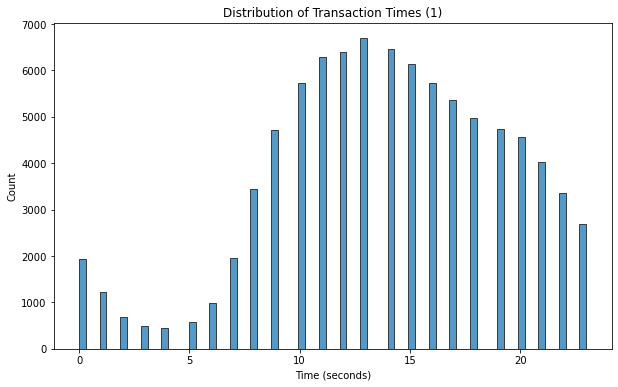

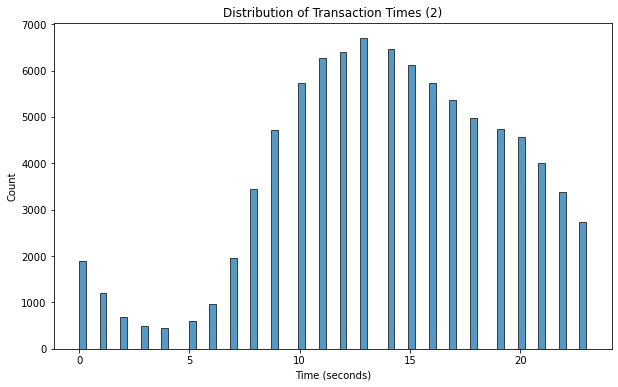

TRN_TYPE
LEGIT    0.977102
FRAUD    0.022898
Name: proportion, dtype: float64


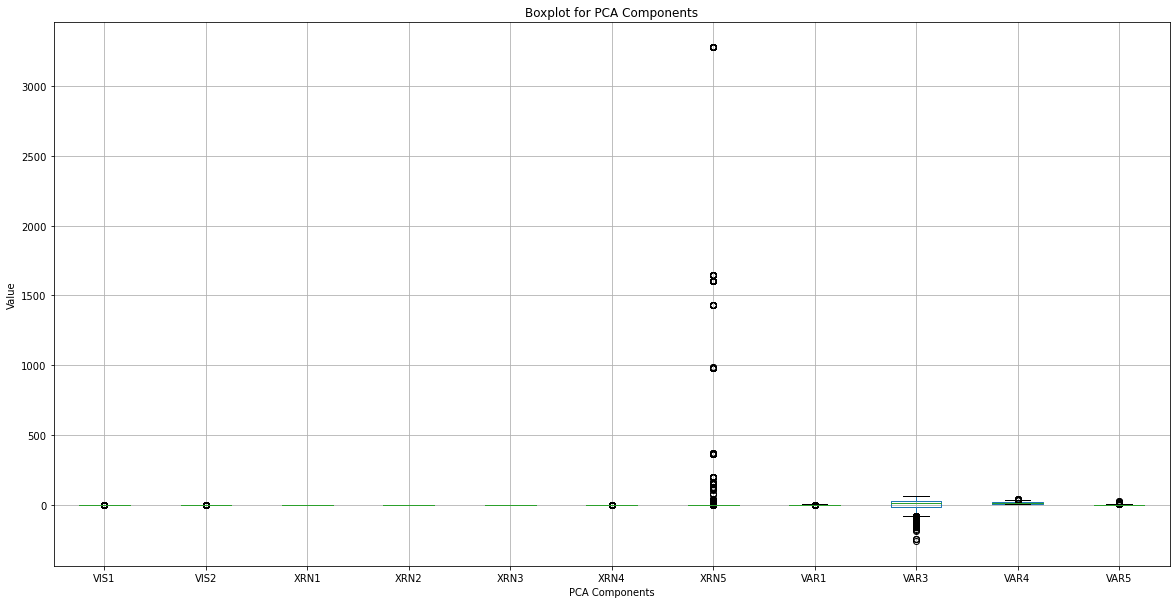

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='TIME1')
plt.title('Distribution of Transaction Times (1)')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='TIME2')
plt.title('Distribution of Transaction Times (2)')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.show()

print(df1['TRN_TYPE'].value_counts(normalize=True))

plt.figure(figsize=(20,10))
df1.boxplot(column=['VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR3', 'VAR4', 'VAR5'])
plt.title('Boxplot for PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Value')
plt.show()

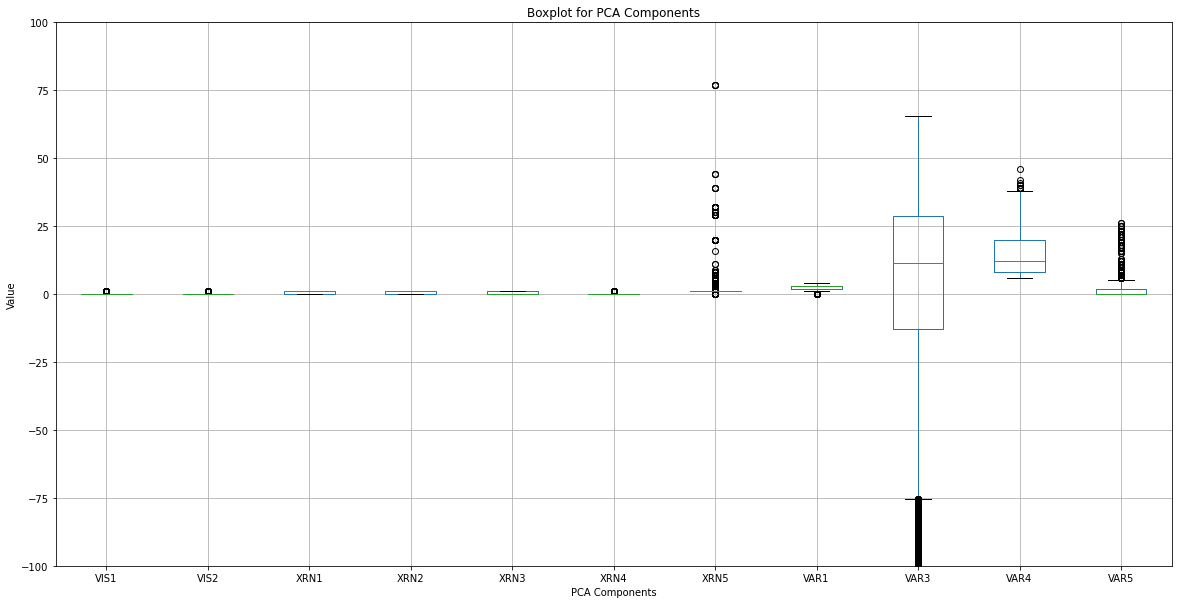

In [10]:
plt.figure(figsize=(20,10))
plt.ylim(-100, 100)
df1.boxplot(column=['VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR3', 'VAR4', 'VAR5'])
plt.title('Boxplot for PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Value')
plt.show()

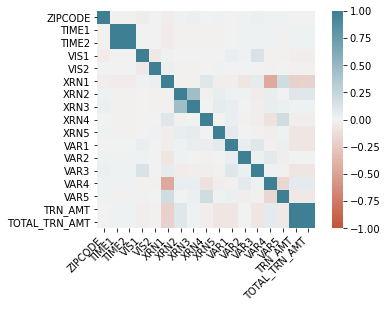

In [11]:
corr = df1.select_dtypes(include='number').corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
X = df1.drop(['TRN_TYPE'], axis=1)
y = df1['TRN_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
71735,XOSOP.COM,OO,644,18,18,1,0,0,0,0,0,1,2,0,50.056,21,3,12.95,12.95
53107,BRZWCURTY.NET,KR,115,20,20,0,0,1,1,1,0,1,0,0,6.640,28,0,12.95,12.95
31381,ZICBXG.COM,VO,601,12,12,0,0,1,1,0,0,1,0,0,-21.600,7,0,38.85,38.85
37141,XOSOP.COM,ROK,655,13,13,0,0,0,1,0,0,1,3,0,32.096,20,1,38.85,38.85
73063,XOSOP.COM,MO,685,3,3,0,0,1,1,1,0,2,3,1,42.088,9,9,12.95,12.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17533,XOSOP.COM,ROB,450,13,13,0,0,1,0,0,0,1,3,1,35.720,10,2,31.08,31.08
46104,XOSOP.COM,ROK,655,15,15,0,0,0,0,0,0,1,2,1,37.112,19,1,49.95,49.95
72051,NVSGZVLSQW.COM,TR,667,17,17,1,0,0,0,0,0,1,0,1,-40.296,19,0,38.85,38.85
8037,BWT.NET,AO,675,12,12,0,0,0,1,0,0,1,3,1,27.200,17,0,12.95,12.95


In [13]:
data = df1.copy()
data.TRN_TYPE = data.TRN_TYPE=='FRAUD'

In [14]:
# %pip install category_encoders

In [15]:
import category_encoders as ce

numeric_columns = ['ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TRN_AMT', 'TOTAL_TRN_AMT']
categorical_columns = ['DOMAIN', 'STATE']

# Assuming 'X_train' is your training data with categorical features
# Replace 'categorical_columns' with the names of your categorical columns
encoder = ce.TargetEncoder(cols=['DOMAIN', 'STATE'])
data_encoded = encoder.fit_transform(data.drop(columns=['TRN_TYPE']), data.TRN_TYPE)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_encoded, data.TRN_TYPE, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

       False       0.99      0.96      0.98     17490
        True       0.26      0.53      0.35       433

    accuracy                           0.95     17923
   macro avg       0.63      0.75      0.66     17923
weighted avg       0.97      0.95      0.96     17923



<AxesSubplot:>

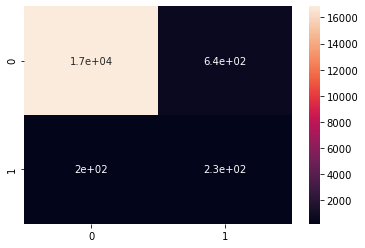

In [17]:
RF_clf = RandomForestClassifier(n_estimators = 150, criterion = 'gini', max_depth=12, 
                             class_weight='balanced', max_features=6)
RF_clf.fit(X_train, y_train)
y_pred_RF = RF_clf.predict(X_test)
print(classification_report(y_test, y_pred_RF))
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True)

In [18]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.66      0.18      0.29       433

    accuracy                           0.98     17923
   macro avg       0.82      0.59      0.64     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

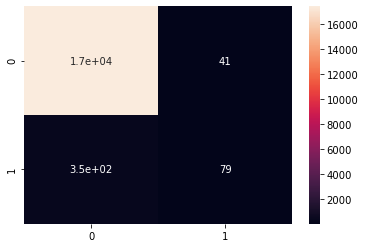

In [19]:
from xgboost import XGBClassifier

XGB_clf = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=1, objective='binary:logistic')
XGB_clf.fit(X_train, y_train)
y_pred = XGB_clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.66      0.18      0.29       433

    accuracy                           0.98     17923
   macro avg       0.82      0.59      0.64     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

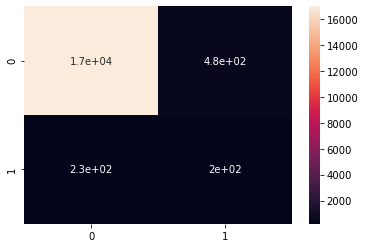

In [20]:
from sklearn.naive_bayes import GaussianNB

GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)  
y_pred_GNB = GNB_clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred_GNB)
sns.heatmap(cm, annot=True)

In [21]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

       False       0.99      0.93      0.96     17490
        True       0.18      0.64      0.28       433

    accuracy                           0.92     17923
   macro avg       0.59      0.78      0.62     17923
weighted avg       0.97      0.92      0.94     17923



<AxesSubplot:>

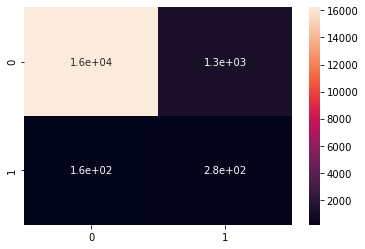

In [22]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_RF_clf = BalancedRandomForestClassifier(sampling_strategy="auto", replacement=True, max_depth=2, bootstrap=True)
bal_RF_clf.fit(X_train, y_train)
y_pred = bal_RF_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.69      0.07      0.12       433

    accuracy                           0.98     17923
   macro avg       0.83      0.53      0.56     17923
weighted avg       0.97      0.98      0.97     17923



<AxesSubplot:>

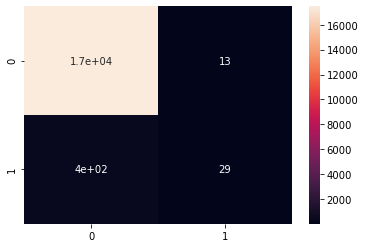

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

lin_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e3))
lin_clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
y_pred = lin_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     17490
        True       0.83      0.13      0.22       433

    accuracy                           0.98     17923
   macro avg       0.91      0.56      0.60     17923
weighted avg       0.98      0.98      0.97     17923



<AxesSubplot:>

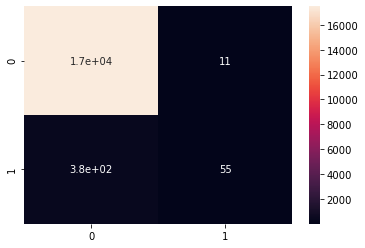

In [24]:
from sklearn.svm import SVC

SVM_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM_clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
y_pred = SVM_clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

We will create an ensemble classifier with the three best performing classifiers so far: random forest, XGBoost, and bayes classifiers.

              precision    recall  f1-score   support

       False       0.99      0.98      0.98     17490
        True       0.34      0.43      0.38       433

    accuracy                           0.97     17923
   macro avg       0.66      0.71      0.68     17923
weighted avg       0.97      0.97      0.97     17923



<AxesSubplot:>

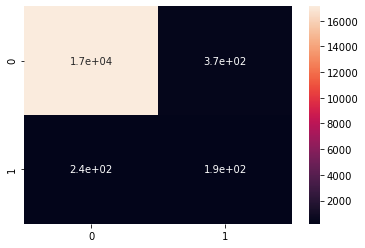

In [32]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('rf', RF_clf), ('gnb', GNB_clf), ('xgb', XGB_clf)], voting='hard')
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Because our custom ensemble classifier performs the best among the models we have tried, we will go ahead and find hyperparameters for our custom ensemble.

Best parameters:  {'rf__max_depth': 14, 'rf__max_features': 8, 'rf__n_estimators': 200, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 10}
Best score:  0.969954364404062
              precision    recall  f1-score   support

       False       0.99      0.98      0.98     17490
        True       0.35      0.41      0.38       433

    accuracy                           0.97     17923
   macro avg       0.67      0.69      0.68     17923
weighted avg       0.97      0.97      0.97     17923



<AxesSubplot:>

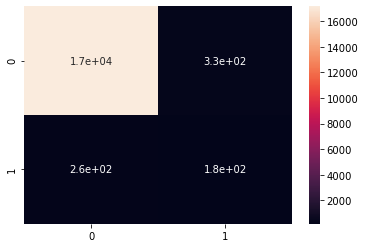

In [26]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [10, 12, 14],
    'rf__max_features': [4, 6, 8]
}

xgb_params = {
    'xgb__n_estimators': [5, 10, 15],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.5, 1]
}

param_grid = {**rf_params, **xgb_params}

eclf = VotingClassifier(estimators=[('rf', RF_clf), ('gnb', GNB_clf), ('xgb', XGB_clf)], voting='hard')

grid_search = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters: ", best_params)
print("Best score: ", best_score)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    pkl = pickle.load(f)
with open('grid_search_results.pkl', 'rb') as f:
    loaded_grid_search = pickle.load(f)

In [30]:
best_model = grid_search.best_estimator_
best_model

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=14,
                                                     max_features=8,
                                                     n_estimators=200)),
                             ('gnb', GaussianNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [31]:
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)
# with open('grid_search_results.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)